In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import pandas as pd
import numpy as np

import os
import tensorflow as tf
from sklearn.manifold import TSNE
from subprocess import check_output


# Any results you write to the current directory are saved as output.

In [2]:
print(tf.__version__)
!python -V


1.11.0-rc1
Python 3.6.6 :: Anaconda, Inc.


In [4]:
#print(os.listdir("../input"))
print(check_output(["ls", "../input"]).decode("utf8"))


fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



In [5]:
data_train_file = "../input/fashion-mnist_train.csv"
data_test_file = "../input/fashion-mnist_test.csv"

df_train = pd.read_csv(data_train_file)
df_test = pd.read_csv(data_test_file)


In [6]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [12]:
# Select all columns but the first
features = df_train[df_train.columns[1:]]
print(features.head())
print(features.values.shape)

   pixel1  pixel2  pixel3    ...     pixel782  pixel783  pixel784
0       0       0       0    ...            0         0         0
1       0       0       0    ...            0         0         0
2       0       0       0    ...            0         0         0
3       0       0       0    ...            0         0         0
4       0       0       0    ...            0         0         0

[5 rows x 784 columns]
(60000, 784)


In [9]:
labels = df_train['label']
labels.describe(include='all')

count    60000.000000
mean         4.500000
std          2.872305
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [13]:
features.values.shape

(60000, 784)

In [19]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"pixels": features.values/255},
        y=labels,
        batch_size=100,
        num_epochs=3,
        shuffle=True)

In [20]:
feature_columns = [tf.feature_column.numeric_column("pixels", shape=784)]

In [21]:
classifier = tf.estimator.LinearClassifier(
                feature_columns=feature_columns, 
                n_classes=10,
                model_dir="./models/linear1"
                )

In [22]:
classifier.train(input_fn=train_input_fn)


In [23]:
features = df_test[df_test.columns[1:]]
labels = df_test["label"]

evaluate_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"pixels": features.values/255},
        y=labels,
        batch_size=100,
        num_epochs=1,
        shuffle=False)

In [24]:
classifier.evaluate(input_fn=evaluate_input_fn)["accuracy"]

0.8398

In [25]:
# Bonus round 1: predictions
features = df_test[df_test.columns[1:]]
labels = df_test["label"]

predict_input_fn = tf.estimator.inputs.numpy_input_fn(        
        x={'pixels': features.iloc[5000:5005].values/255},
        batch_size=1,
        num_epochs=1,
        shuffle=False)
predictions = classifier.predict(input_fn=predict_input_fn)

for prediction in predictions:
    print("Predictions:    {} with probabilities {}\n".format(
        prediction["classes"], prediction["probabilities"]))
print('Expected answers values: \n{}'.format(
    labels.iloc[5000:5005]))

Predictions:    [b'1'] with probabilities [5.7030856e-08 9.9999499e-01 4.5030358e-08 2.7750575e-06 2.2156275e-06
 1.6931392e-21 3.3415102e-09 5.3895652e-18 2.6036551e-10 1.8301781e-18]

Predictions:    [b'6'] with probabilities [1.8847473e-03 2.6059313e-05 1.8405412e-01 1.0129731e-05 8.5942083e-05
 3.8973140e-18 8.1388360e-01 7.0660281e-29 5.5438872e-05 6.1384369e-22]

Predictions:    [b'4'] with probabilities [9.5862319e-04 3.5619428e-06 5.7421118e-04 5.6254915e-03 6.3929337e-01
 1.4365425e-16 3.5325342e-01 2.9444088e-19 2.9138595e-04 1.2339624e-17]

Predictions:    [b'1'] with probabilities [3.8481787e-09 9.9999785e-01 4.3475694e-09 9.1417388e-07 1.2396004e-06
 2.2802653e-25 6.3667305e-10 7.9862078e-20 2.1958954e-12 1.2811041e-19]

Predictions:    [b'9'] with probabilities [2.0792319e-15 1.7221245e-18 2.2008083e-14 1.2545504e-13 1.8621752e-13
 2.0534690e-03 6.8902261e-14 5.3718756e-04 4.4737554e-11 9.9740940e-01]

Expected answers values: 
5000    1
5001    2
5002    4
5003    1
5004

In [26]:
# Bonus round 2: visualizing our predictions
# Import, setup, and a utility for int->string class conversion
import matplotlib.pyplot as plt
%matplotlib inline
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

def get_label_cls(label):
    """given an int label range [0,9], return the string description of that label"""
    return class_table[label]

get_label_cls(3)

'Dress'

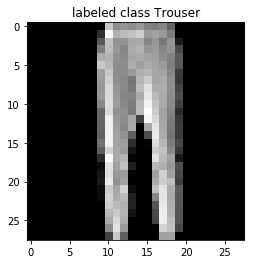

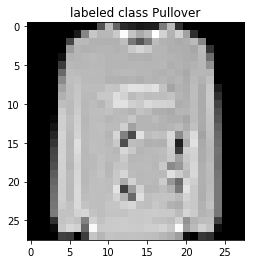

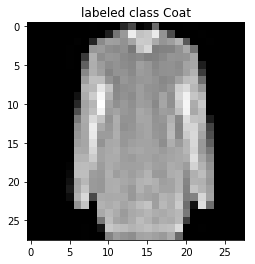

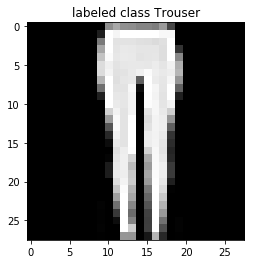

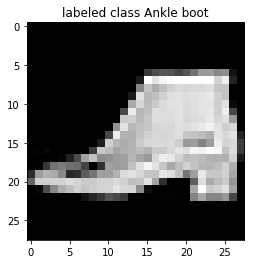

In [27]:
for i in range(5000,5005): 
    sample = np.reshape(df_test[df_test.columns[1:]].iloc[i].values/255, (28,28))
    plt.figure()
    plt.title("labeled class {}".format(get_label_cls(df_test["label"].iloc[i])))
    plt.imshow(sample, 'gray')

In [29]:
DNN = tf.estimator.DNNClassifier(
                feature_columns=feature_columns, 
                hidden_units=[40,30,20],
                n_classes=10,
                model_dir="./models/deep1"
                )


In [30]:
DNN.train(input_fn=train_input_fn)


In [31]:
DNN.evaluate(input_fn=evaluate_input_fn)["accuracy"]

0.8058

In [33]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df_train)
standardized_data.shape

(60000, 785)

In [34]:
model = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
reduced_data = model.fit_transform(standardized_data)

KeyboardInterrupt: 

In [32]:
reduced_df = np.vstack((reduced_data.T, label)).T
reduced_df = pd.DataFrame(data=reduced_df, columns=["X", "Y", "label"])
reduced_df.label = reduced_df.label.astype(np.int)
reduced_df.head()

NameError: name 'reduced_data' is not defined

In [35]:
x 
import seaborn as sns
reduced_df.dtypes

NameError: name 'x' is not defined

In [36]:
z
g = sns.FacetGrid(reduced_df, hue='label', size=6).map(plt.scatter, 'X', 'Y').add_legend()

NameError: name 'z' is not defined

In [37]:
Converted 2 dimensions are X and Y and visualization is shown in 2-D. Some more points anout t-sne:

Perplexity ensures the number of neighbours t-sne is preserving on the basis of distance metric.
Try perplexity value in the range of 5 to 50, as suggested in research paper.
Try multiple value of steps untill changes in cluster is saturated.
Distance between clusters may not be useful.
With varying value of perplexity and steps, we may see some shapes of cluster, these are just meaningless.
t-sne generally expands dense cluster and shrink sparse cluster. Read amazing blog on interpretation of t-sne results here

SyntaxError: invalid syntax (<ipython-input-37-ee75f2f9c2b8>, line 1)

**References**
1. https://www.kaggle.com/saurabh105/t-sne-visualization-on-mnist-dataset
2. Wattenberg, et al., "How to Use t-SNE Effectively", Distill, 2016. http://doi.org/10.23915/distill.00002
3. https://www.kaggle.com/accepteddoge/fashion-mnist-with-numpy-neural-network